<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [10]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [11]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [12]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [13]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [14]:
boston_df.shape

(506, 14)

In [34]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_range
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Between 35 and 70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 or more years
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Between 35 and 70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Between 35 and 70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Between 35 and 70


# **Graphics and explanations about variables**

## 1) Boxplot of Median Value of Owner-occupied Homes

[Text(0, 0.5, 'Value by U$1000.00'),
 Text(0.5, 1.0, 'Median Value of Owner-occupied Homes')]

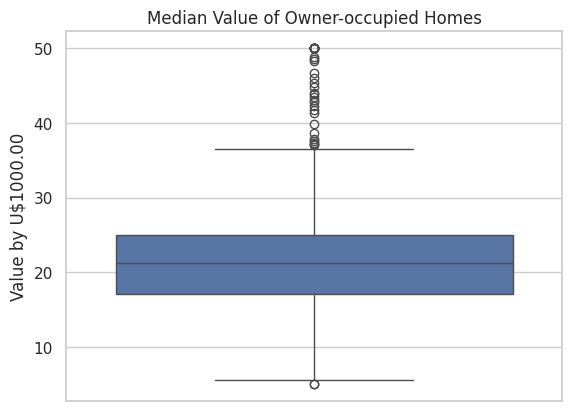

In [30]:
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set( ylabel= 'Value by U$1000.00',title='Median Value of Owner-occupied Homes')

## The median value of occuped by owners of homes is close US$ 21.000,00. 

## 2) Bargraph for Charles River

[Text(0.5, 1.0, 'Value of houses delimited by and not by Charles River'),
 Text(0, 0.5, 'Median valeu for each US$1,000.00'),
 Text(0.5, 0, 'Charles River delimitation')]

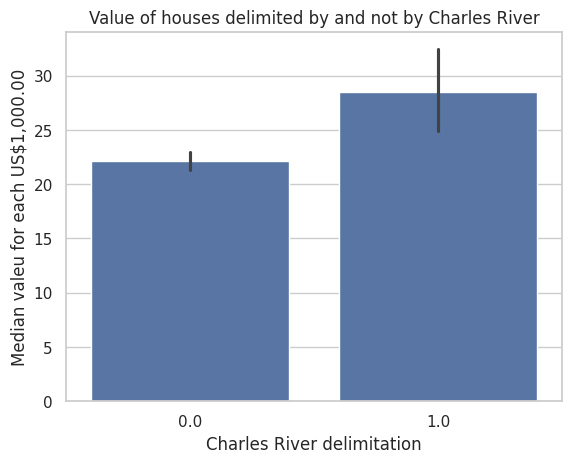

In [17]:
sns.set(style="whitegrid")
ax = sns.barplot( x="CHAS",y='MEDV', data=boston_df)
ax.set(title='Value of houses delimited by and not by Charles River',ylabel= 'Median valeu for each US$1,000.00',xlabel= 'Charles River delimitation' )

## Houses delimited by Charles River are more expensive

In [20]:
boston_df['AGE'].describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

In [21]:
lst_ranges = [(0,35), (35,70), (70, np.infty)]
ranges = pd.IntervalIndex.from_tuples(lst_ranges, closed = 'left')
boston_df['Age_range'] = pd.cut(boston_df['AGE'], bins=ranges)
boston_df[['AGE', 'Age_range']].head()
boston_df['Age_range'].dtype
labels = ['35 or less years', "Between 35 and 70", "70 or more years"]
boston_df['Age_range'] = boston_df['Age_range'].cat.rename_categories(labels)
boston_df['Age_range']

0      Between 35 and 70
1       70 or more years
2      Between 35 and 70
3      Between 35 and 70
4      Between 35 and 70
             ...        
501    Between 35 and 70
502     70 or more years
503     70 or more years
504     70 or more years
505     70 or more years
Name: Age_range, Length: 506, dtype: category
Categories (3, object): ['35 or less years' < 'Between 35 and 70' < '70 or more years']

## 3) Boxplot for MEDV x AGE

[Text(0, 0.5, 'Median valeu for each US$1,000.00'),
 Text(0.5, 1.0, 'Median Value of occupied of homes x Houses Age')]

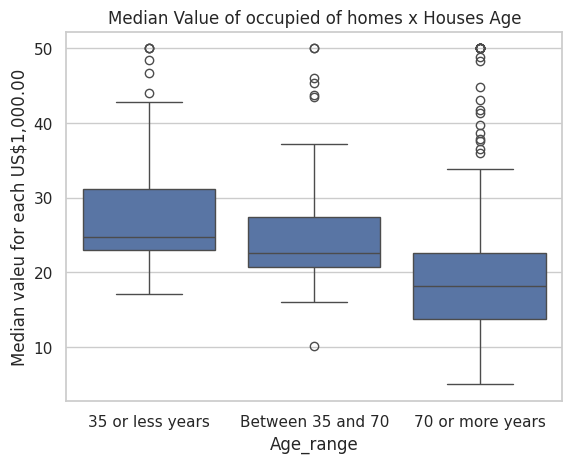

In [22]:
ax = sns.boxplot(x=boston_df['Age_range'], y='MEDV', data= boston_df)
ax.set( ylabel= 'Median valeu for each US$1,000.00',title= 'Median Value of occupied of homes x Houses Age')

## Old houses are cheaper than newer houses

## 4) Scatterplot for NOX and INDUS

[Text(0.5, 1.0, 'Oxide Nitrous (NOX) x Nonreatil business by acre(INDUS)')]

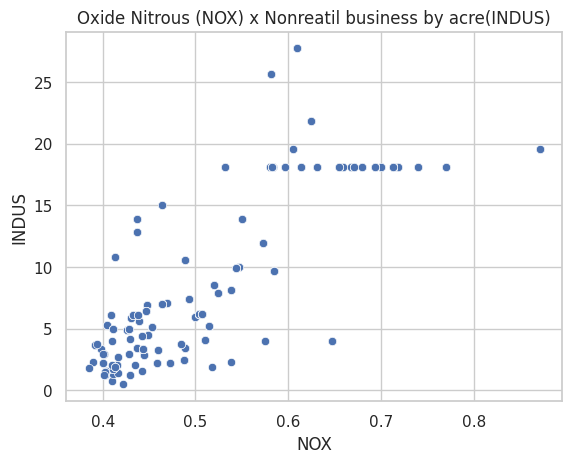

In [29]:
ax1 = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax1.set(title='Oxide Nitrous (NOX) x Nonreatil business by acre(INDUS)')

## Business of nonretail by acre are concentrated at area where oxide nitrous indice are lower

## 5) Histogram for Ratio Student/Teacher

<ipython-input-23-fe442e394420>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df['PTRATIO'])


[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Ratio Student/Teacher'),
 Text(0.5, 1.0, 'Frequency X Ratio Student/teacher')]

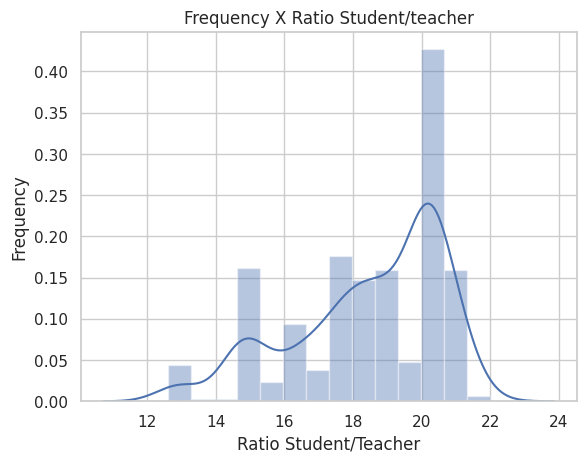

In [23]:
ax = sns.distplot(boston_df['PTRATIO'])
ax.set( ylabel= 'Frequency', xlabel= 'Ratio Student/Teacher',title='Frequency X Ratio Student/teacher')

## It is more comun to have close to 21 students for each teacher

# **Statistics Tests and conclusions**

## 1) About significative diference between houses delimitied by Charles River or not.
#### H0: There is no difference of median value between houses delimited and not delimited by Charles River,
#### HA: There is difference of median value between houses delimited or not by Charles River.


In [31]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                  boston_df[boston_df['CHAS'] == 1]['MEDV'])

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

## The p-value is 7.390623170519905e-05, then is less then 0.05.
## We can assume that there is difference of median value between houses delimited and not by Charles River.
### Houses delimited by Charles River are more expensive.


## 2) There is Median Value difference between house built 35 or less, between 35 and 70, and more than 70 yeas?
#### H0: There is no difference of median value between houses built 35 years or less, between 35 and 70, and older than 70.
#### HA: There is difference of median value between houses built 35 years or less, between 35 and 70, and older than 70.

In [25]:
tirth_five_or_less = boston_df[boston_df['Age_range'] == '35 or less years']['MEDV']
between_35_and_70 = boston_df[boston_df['Age_range'] == "Between 35 and 70"]['MEDV']
seventy_or_more = boston_df[boston_df['Age_range'] == "70 or more years"]['MEDV']

In [26]:
f_statistic, p_value = scipy.stats.f_oneway(tirth_five_or_less,between_35_and_70,seventy_or_more)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


## The P-Value is 1.7105011022702984e-15, less than 0.05.
## There is difference of Median Value between the three groups of age's house.
### Old houses are cheaper than newer houses.

## 3) There is no correlation between oxide nitrous level and nonretail business?
#### H0: There is no correlation between oxide nitrous level and nonretail business
#### HA: There is correlation between oxide nitrous level and nonretail business

In [27]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

## Since the P-value of Pearson test is 7.913361061210442e-98, less than 0.05.
## We conclude that threre is a correlation between oxide nitrous level and nonretail business.
### How level of Nitrous Oxide increase number of business come down.

## 4) What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?
### H0: The additional weighted distance to the five Boston employment centres have no impact on the median value of owner occupied homes.
### H0: The additional weighted distance to the five Boston employment centres have impact on the median value of owner occupied homes.

In [32]:
lm = ols('DIS ~ MEDV', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

             df       sum_sq     mean_sq         F        PR(>F)
MEDV        1.0   139.868826  139.868826  33.57957  1.206612e-08
Residual  504.0  2099.308819    4.165295       NaN           NaN


## The Median value of owner occupied home increase with addtional distance to the five Boston employment centers.
